# Imports

In [7]:
import pandas as pd
import numpy as np

#Sklearn tools
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#3 classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [8]:
df=pd.read_csv("crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Check Data Information

In [9]:
#column info
print(df.info())

#row & columns
print(df.shape)

#summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
(2200, 8)
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.

# Check Missing Values

In [10]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# Check Duplicates

In [11]:
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool
0


# Encoding

In [12]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

# Scaling: Normalization

In [13]:
numeric_cols=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

#Initialize scaler
scaler=MinMaxScaler()

df[numeric_cols]=scaler.fit_transform(df[numeric_cols])

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,rice
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,rice
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,rice
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,rice
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,rice


# Train Test Split

In [14]:
X = df.drop('label',axis=1)
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Training, Testing Multiple Classifiers

In [15]:
models={
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}
for name,model in models.items():
    
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    print("Name: ", name)
    print(f"{name}  with accuracy : {accuracy_score(Y_test,y_pred)}")
    print("Confusion matrix: \n",confusion_matrix(Y_test, y_pred))
    print("Report: \n", classification_report(Y_test, y_pred))

Name:  Logistic Regression
Logistic Regression  with accuracy : 0.9477272727272728
Confusion matrix: 
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]


# Selecting Best Model

In [16]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)

y_pred = model_RFC.predict(X_test)

print(f"Random Forest with accuracy",accuracy_score(Y_test,y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, y_pred))
print("Classification report: \n", classification_report(Y_test, y_pred))

Random Forest with accuracy 0.9977272727272727
Confusion matrix: 
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

# Visualization

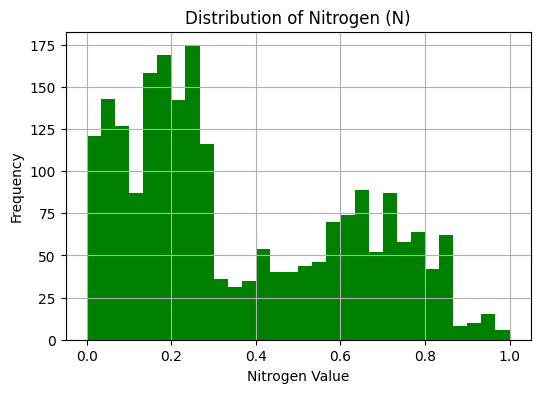

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df['N'].hist(bins=30, figsize=(6,4), color='green')
plt.title("Distribution of Nitrogen (N)")
plt.xlabel("Nitrogen Value")
plt.ylabel("Frequency")
plt.show()

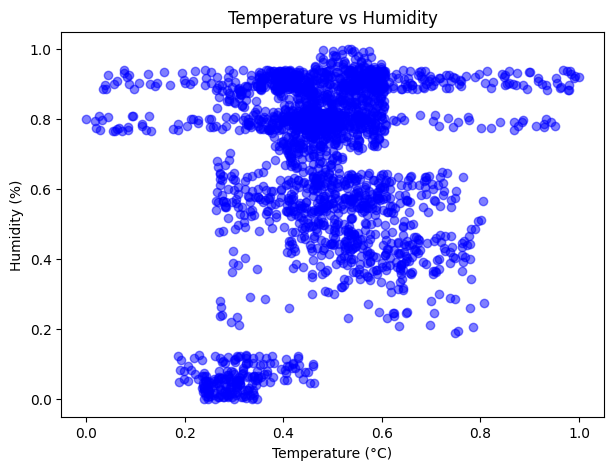

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(df['temperature'], df['humidity'], c='blue', alpha=0.5)
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.show()

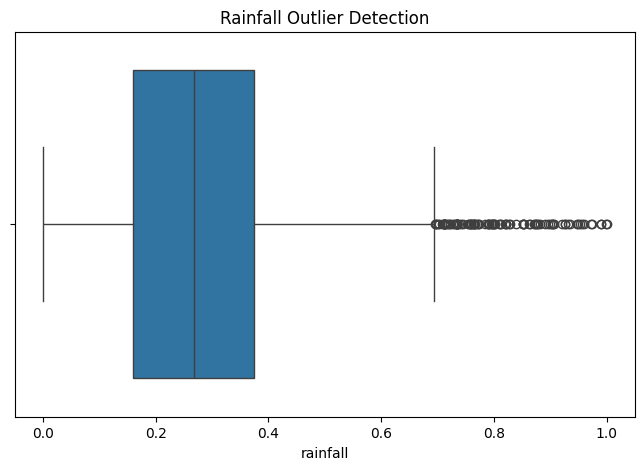

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['rainfall'])
plt.title("Rainfall Outlier Detection")
plt.show()

In [73]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(model,f)